# Decision Trees and Random Forests

After talking about a lot of concepts, models and ideas of preparing data for machine learning, let's talk about one of the most important algorithms in machine learning that opened a new world of possibilities for us. It's two of my favorite algorithms, `Decision Tree` and `Random Forest`. As always I'm `Md. Rishat Talukder`. Let's get started.

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)


# What is Decision Tree?

`Decision trees` algorithm is a non-linear machine learning algorithm that builds a tree of decisions that predicts the value of a target variable based on the values of other variables. It is a supervised learning algorithm that can be used for both classification and regression problems.

## How does it work?

The main steps of this algorithm are:

- Choose the `best feature` to `split` on.
- Split the dataset into two or more `subsets` based on the `best feature`.
- Recursively build a `tree` on each subset.
- Make predictions by following the `path` from the root to the leaf node.
- The leaf node contains the `predicted value` of the target variable.
- The tree is `pruned` to reduce overfitting.

And technical unga-bunga going on here.

Let's break it down.

Suppose we have a dataset like this:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 25  | High   | Good         | Yes           |
| 22  | High   | Bad          | Yes       |
| 28  | Low    | Good         | Yes           |
| 35  | High   | Good         | No            |
| 40  | Low    | Bad          | No            |
| 55  | High   | Good         | Yes           |
| 60  | Low    | Bad          | No       |
| 65  | Low    | Good         | No            |

The target column is `Loan_Approved`. We want to predict if a person will be approved for a loan based on their age, income, and credit score.

So, first we find the most `pure` feature columne.

What do I mean by pure?

_Pure means that most of the values in the column point to a single value or category._

So, let's count.

The target column has `2` classes. `Yes` and `No`. 

So, for Income, we have `2` classes. `High` and `Low`.

High => 3 Yes, 1 No
Low => 1 Yes, 3 No

For Credit_Score, we have `2` classes. `Good` and `Bad`.

Good => 3 Yes, 2 No
Bad => 1 Yes, 2 No

Now, we have to do this for the `age` column and then compare them. And then we can figure out which one is the most pure.

> This is going to be a hastle right?!

OOOOOOORRRRRR,

We can just use `Entropy` or `Gini` impurity.

## Gini Impurity

`Entropy` and `Gini` impurity are used to `measure the impurity` of a set of data. They are both used to determine the quality of a split in a decision tree.

By default `sci-kit learn` uses `Gini` index.

So, I'll use `Gini` impurity.

So, the quation for `Gini` impurity is:

$$
Gini = 1 - \sum (p_c)^2
$$

Where `p_c` is the probability of a class `c`.

So, let's get the `Gini` index for our target column.

Target column has `2` classes. `Yes` and `No`.

4 Yes, 4 No

So, the `Gini` impurity is:

$$
Gini = 1 - [p_Y^2 + p_N^2] 
$$

$$
Gini = 1 - [(\frac{4}{8})^2 + (\frac{4}{8})^2]
$$

$$
Gini = 1 - [0.5^2 + 0.5^2]
$$

$$
Gini = 1 - [0.25 + 0.25]
$$

$$
Gini = 1 - 0.5
$$

$$
Gini(Target) = 0.5
$$

So, gini impurity of our target column is `0.5`.

> Remember one thing here: Low gini impurity is better than high gini impurity.


So, the target column has impurity of `0.5`.

Now, we need to get the impurity of the `credit_score` columns.

| Credit_Score | Loan_Approved |
| ------------ | ------------- |
| Good         | Yes           |
| Bad          | Yes       |
| Good         | Yes           |
| Good         | No            |
| Bad          | No            |
| Good         | Yes           |
| Bad          | No       |
| Good         | No            |


We have to get the impurity of the `credit_score` column in relation to the target column.

That mean each class can have a different impurity.

So, as credit score and target column has `2` classes. `Good` and `Bad`.

We need to find the impurity of `Good` and `Bad` in relation to `Yes` and `No`.

| Credit_Score | Yes | No | Total |
| ------------ | --- | --- | ----- |
| Good         | 3   | 2  | 5     |
| Bad          | 1   | 2  | 3     |

So, the impurity of `Good` in relation to `Yes` and `No` is:

$$
Gini(Good | Target) = 1 - [(\frac{3}{5})^2 + (\frac{2}{5})^2]
$$

$$
Gini(Good | Target) = 1 - [.36 + .16] = 1 - 0.52
$$

So, 

$$
Gini(Good | Target) = 0.48
$$

And the impurity of `Bad` in relation to `Yes` and `No` is:

$$
Gini(Bad | Target) = 1 - [(\frac{1}{3})^2 + (\frac{2}{3})^2]
$$

$$
Gini(Bad | Target) = 1 - [0.33^2 + 0.66^2]
$$

$$
Gini(Bad | Target) = .444
$$

We have both the impurity of `Good` and `Bad` in relation to `Yes` and `No`.

We can see that `Bad` credit score has a lower impurity and `Good` credit score has a higher impurity.

So, We get a nice view of the impurity of `credit_score` in relation to `target`.

But we still have to figure out the impurity of the other columns.

So, we need a single value that represents the impurity of all the columns.

This is where `weighted average gini impurity` comes in.

This will represent the overall impurity of all the columns.

The equation for `weighted average gini impurity` is:

$$
Weighted \ average \ gini= \sum (n_c / n) * Gini(c)
$$

Where `n_c` is the number of samples in class `c` and `n` is the total number of samples.

Total number of samples is `8` in this case, and the number of samples in class `Good` is `5` and the number of samples in class `Bad` is `3`.

$$
Weighted \ average \ gini = \frac{5}{8}*Gini(Good) + \frac{3}{8}*Gini(Bad)
$$

$$
Weighted \ average \ gini = \frac{5}{8}*0.48 + \frac{3}{8}*0.444
$$

$$
Weighted \ average \ gini = 0.46
$$

> **So, the average gini impurity of the `credit_score` column is `0.46` in ralation to the `target` column.**

Now, we do the same for the other columns.

Let's find the average gini impurity of the `income` feature.

| Income | Loan_Approved |
| ------ | ------------- |
| High   | Yes           |
| High   | Yes       |
| Low    | Yes           |
| High   | No            |
| Low    | No            |
| High   | Yes           |
| Low    | No       |
| Low    | No            |

So, we do the same as before.

| Income | Yes | No | Total |
| ------ | --- | --- | ----- |
| High   | 3   | 1  | 4     |
| Low    | 1   | 3  | 4     |

Now we find the impurity of `High` in relation to `Yes` and `No`:

$$
Gini(High | Target) = 1 - [(\frac{3}{4})^2 + (\frac{1}{4})^2]
$$

You can do the math yourself,

$$
Gini(High | Target) = 0.375
$$

For, the impurity of `Low` in relation to `Yes` and `No`:

$$
Gini(Low | Target) = 1 - [(\frac{1}{4})^2 + (\frac{3}{4})^2]
$$

$$
Gini(Low | Target) = 0.375
$$

Now, the weighted average gini impurity of `income` is:

$$
Weighted \ average \ gini = \frac{4}{8}*Gini(High) + \frac{4}{8}*Gini(Low)
$$

$$
Weighted \ average \ gini = .375
$$

> **The average gini impurity of the `income` column is `0.375` in ralation to the `target` column.**

Which is actually better than the average gini impurity of the `credit_score` column.

We have one last thing to do.

Find the impurity of the `age` column.

| Age | Loan_Approved |
| --- | ------------- |
| 25  | Yes           |
| 22  | Yes       |
| 28  | Yes           |
| 35  | No            |
| 40  | No            |
| 55  | Yes           |
| 60  | No       |
| 65  | No            |

Now, this column does not have any classes because this is a continuous variable.

So, what do we do?

First we need to sort the values.

| Sorted Age | Loan_Approved |
| ---------- | ------------- |
| 22         | Yes           |
| 25         | Yes       |
| 28         | Yes           |
| 35         | No            |
| 40         | No            |
| 55         | Yes           |
| 60         | No       |
| 65         | No            |

Now, what? 

Now we need to find the right place to split the data.

Now, if you look at the above table, you can see that when the age is `28` of less the `loan` is surely `Yes`. So, we take that as a check point.

We have to keep a gap for the check point. So, what we can do is take the mid point of `28` and `35`. So, we take `31.5` as our check point.

| Sorted Age | Yes | No | Total |
| Less than equal to 31.5 | 3 | 0 | 3 |
| More than 31.5 | 1 | 4 | 5 |

So, the impurity of `Less than equal to 28` in relation to `Yes` and `No` is:

$$
Gini(\leq 31.5 | Target) = 1 - [(\frac{3}{3})^2 + (\frac{0}{3})^2]
$$

$$
Gini(\leq 31.5 | Target) = 0
$$

The impurity of `More than 28` in relation to `Yes` and `No` is:

$$
Gini(> 31.5 | Target) = 1 - [(\frac{1}{5})^2 + (\frac{4}{5})^2]
$$

$$
Gini(> 31.5 | Target) = 0.32
$$

Now, the weighted average gini impurity of `age` is:

$$
Weighted \ average \ gini = \frac{3}{8}*Gini(\leq 28) + \frac{5}{8}*Gini(> 28)
$$

$$
Weighted \ average \ gini = .20
$$

Which is actually the best average gini impurity of the `age` column.

> **So, we can see that the `age` column has the best average gini impurity in relation to the `target` column.**

And we choose the best feature to split on as `age`.

## Splitting the data

Now, that we have a best feature to split on, let's split the data.

We measured impurity based on the age `less than equal to 31.5` and `more than 31.5`.

We will split the data into two subsets.

For, `less than equal to 31.5`:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 25  | High   | Good         | Yes           |
| 22  | High   | Bad          | Yes       |
| 28  | Low    | Good         | Yes           |

For, `more than 31.5`:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 35  | High   | Good         | No            |
| 40  | Low    | Bad          | No            |
| 55  | High   | Good         | Yes           |
| 60  | Low    | Bad          | No       |
| 65  | Low    | Good         | No            |


Now, if you look at the target column for Age `less than equal to 31.5`, all the outcomes are `Yes`. So, this is a pure subset and there is no need for extra work.

SO, we can make a simple tree for the verdict, If the age is less than equal to 31.5, then the loan_approved is `Yes`. and if the age is more than 31.5, then the loan_approved can be either `Yes` or `No`.


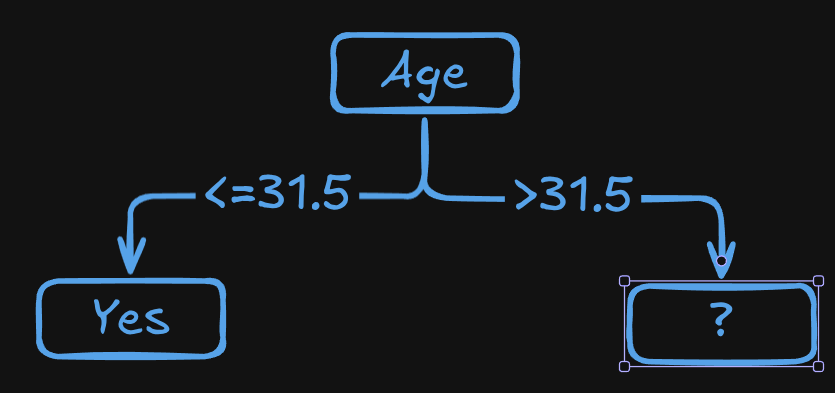


So, what do we do now?

We repeat the process for the remaining columns and now only use the `greater than 31.5` subset.

So, let's find the best feature for the `more than 31.5` subset.

First find the impurity of the `Income` column when `age` is `geater than 31.5`:

| Income | Loan_Approved |
| ------ | ------------- |
| High   | No            |
| Low    | No            |
| High   | Yes           |
| Low    | No       |
| Low    | No            |

Now, make a count table:

| Income | Yes | No | Total |
| ------ | --- | --- | ----- |
| High   | 1   | 1   | 2     |
| Low    | 0   | 3   | 3     |

Now, Finding the impurity:

$$
Gini(High | Loan_Approved) = .5
$$

$$
Gini(Low | Loan_Approved) = 0
$$

So, the weighted average gini impurity is:

$$
Weighted \ average \ gini = \frac{2}{5}*.5 + 0
$$

$$
Weighted \ average \ gini = .2
$$

> **The average gini impurity of the `Income` column is `0.2` in ralation to the `Loan_Approved` column.**

Now let's do the same for the `Credit_Score` column.

| Credit_Score | Loan_Approved |
| ------------ | ------------- |
| Good         | No            |
| Bad          | No            |
| Good         | Yes           |
| Bad          | No       |
| Good         | No            |

Count table:

| Credit_Score | Yes | No | Total |
| ------------ | --- | --- | ----- |
| Good         | 1   | 2   | 3     |
| Bad          | 0   | 2   | 2     |

Now, finding the impurity:

$$
Gini(Good | Loan_Approved) = .44
$$

$$
Gini(Bad | Loan_Approved) = 0
$$

So, the weighted average gini impurity is:

$$
Weighted \ average \ gini = \frac{3}{5}*.44 + 0 = .264
$$

> **The average gini impurity of the `Credit_Score` column is `0.264` in ralation to the `Loan_Approved` column.**

So, as `income` has the best average gini impurity, we choose `Income` as the best feature to split on.

_If the age is greater than 31.5 and the income is `High`_:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 35  | High   | Good         | No            |
| 55  | High   | Good         | Yes           |

_If the age is greater than 31.5 and the income is `Low`_:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 40  | Low    | Bad          | No            |
| 60  | Low    | Bad          | No       |
| 65  | Low    | Good         | No            |

Now, from the above split we can clearly see that when the `income` is low the loan is not approved.

So, we can now update the tree:

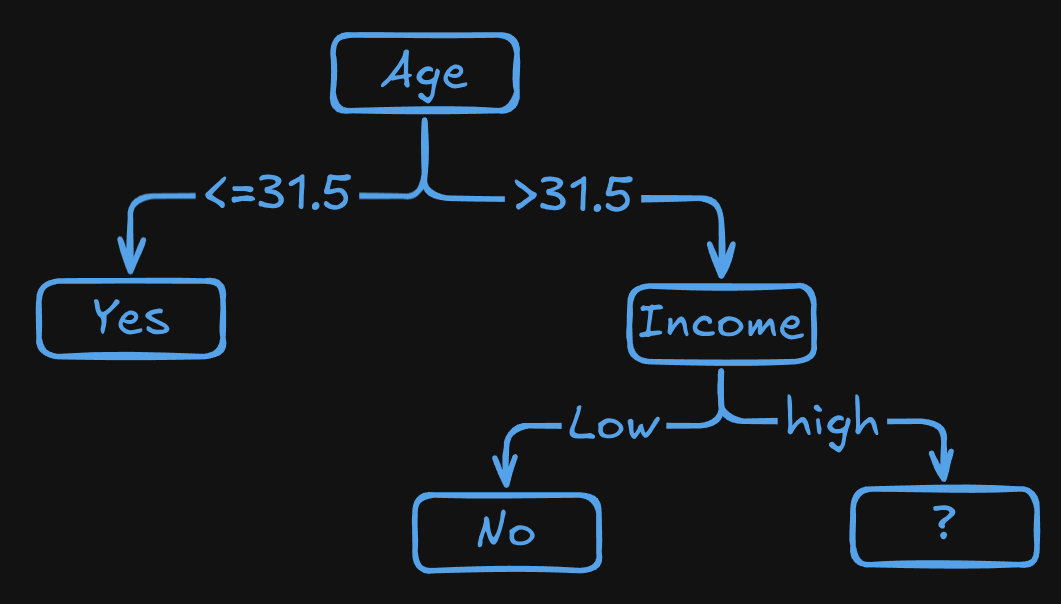

Now, only one step to go.

If the age is geater than 31.5 and the income is `High` we get split like this:

| Age | Income | Credit_Score | Loan_Approved |
| --- | ------ | ------------ | ------------- |
| 35  | High   | Good         | No            |
| 55  | High   | Good         | Yes           |

Here the credit score only has 2 sample and both are `Good` but the loan has both values.

This is called a `Non-separable` node.

We know that we can only split on `credit score` now but as `credit score` only has `good` there can only be one decision but there are two `outcomes` in the `Loan_Approved` column.

So, in this kind of situation we can't make a decision and the decision is done by pure probability.

So, in this case the probability of `loan_approved` is `50%` for `good` credit score.

And the final tree looks like this:

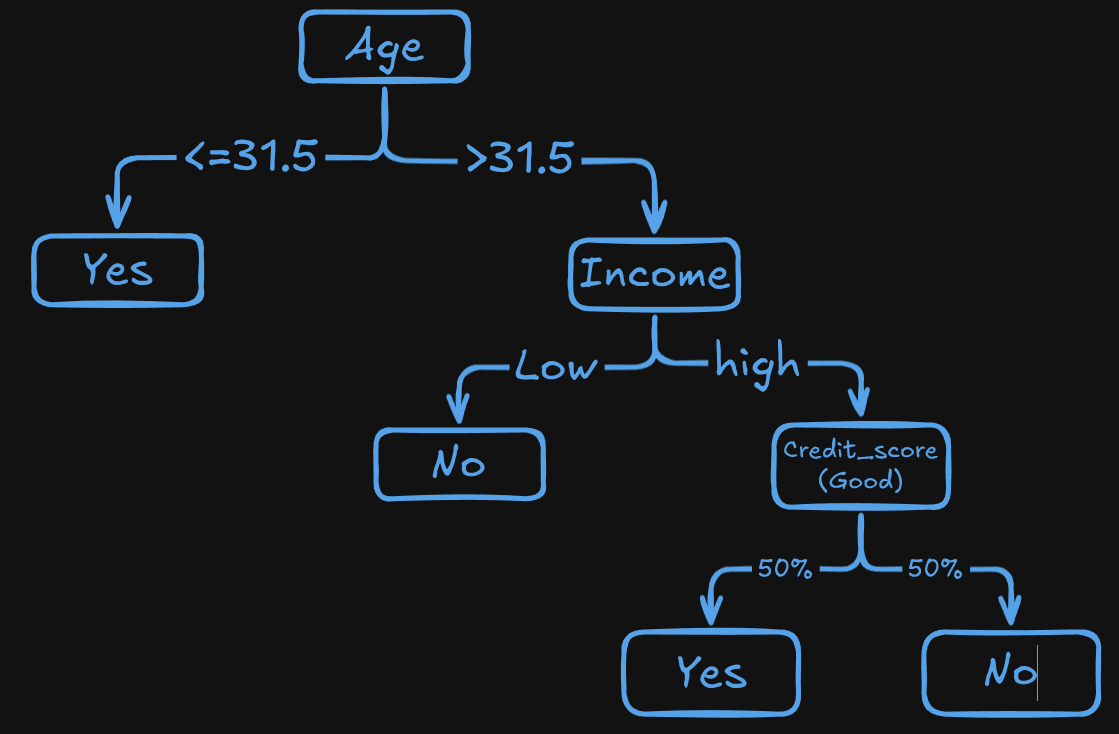

> A decision tree model can get overfitted easily because this model is heavily dependent on the training data and can learn the patterns too well.

I hope You got the general idea of how the decision tree works. Now, let's get into the action.

# Implementing the Decision Tree

Let's go through the general life cycle of a machine learning model.

## Data Collection

For this section I'll be using a very famous dataset called the `Kyphosis` dataset.

> You can get the dataset in my [GitHub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero) repository or from [Kaggle](https://www.kaggle.com/datasets/abbasit/kyphosis-dataset).


Let's load the data using pandas and also I'll import numpy for later use.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('./kyphosis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


It's a fairly small dataset containing 4 features and 81 samples. 

This dataset contain data of people who have been affected by a disease called `kyphosis`. Kyphosis is a disease that affects the spine of the body and causes the spine to curve abnormally.

Here,

- `Age` is the age of the person in months.
- `Number` is the number of the spine that is affected by the kyphosis.
- `Start` is the starting point of the kyphosis.
- `Kyphosis` is the severity of the kyphosis.

So, it's pretty obvious that `kyphosis` is the target variable.